In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/high_popularity_spotify_data.csv')
data.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [ ]:
data.shape

(1686, 29)

In [ ]:
data.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,0.650362,-6.704131,0.171579,0.525737,3.950178,0.100926,75.806050,0.041520,0.578292,5.338078,214562.125741,0.221220
std,0.184908,27.066029,0.157721,3.377068,0.123953,0.236113,0.326673,0.099748,6.032532,0.156556,0.493979,3.608208,58310.747929,0.250593
min,0.001610,49.305000,0.136000,-43.643000,0.021000,0.034800,1.000000,0.023200,68.000000,0.000000,0.000000,0.000000,61673.000000,0.000013
25%,0.551000,100.058750,0.543250,-7.950250,0.093400,0.339000,4.000000,0.037900,71.000000,0.000000,0.000000,2.000000,176607.750000,0.023050
50%,0.689000,120.001000,0.664500,-5.974500,0.121000,0.528000,4.000000,0.058100,75.000000,0.000006,1.000000,5.000000,211180.000000,0.124000
75%,0.807000,136.833500,0.769000,-4.687250,0.210000,0.720000,4.000000,0.118000,79.000000,0.000814,1.000000,8.000000,244993.250000,0.334750
max,0.990000,209.688000,0.979000,1.295000,0.950000,0.978000,5.000000,0.848000,100.000000,0.971000,1.000000,11.000000,547107.000000,0.995000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [ ]:
print(data.columns)

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')


In [ ]:
print(data.isnull().sum())

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            1
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64


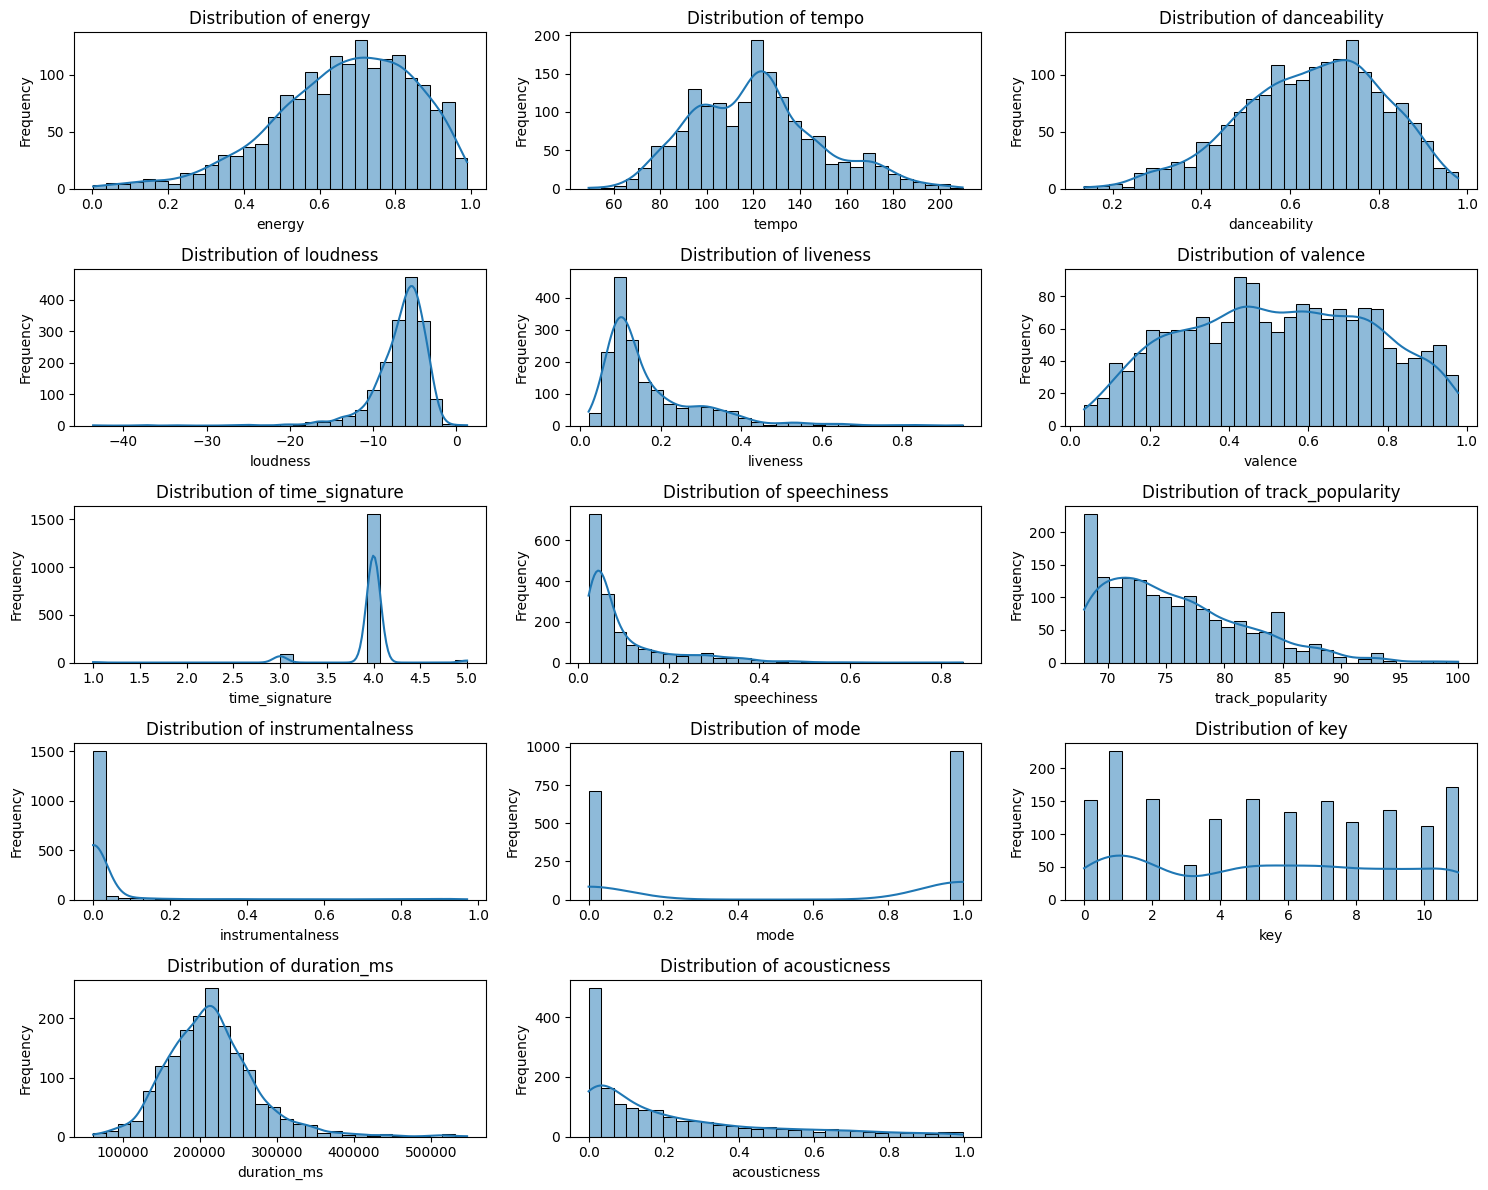

In [ ]:


#Load Data
data = pd.read_csv("high_popularity_spotify_data.csv")
#Selecting Only Numeric Columns
numeric_columns = data.select_dtypes(include=['number']).columns
#Plot Histogram for Each Numeric Column
plt.figure(figsize=(15, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i) #Adjust subplot grid based on number of columns
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


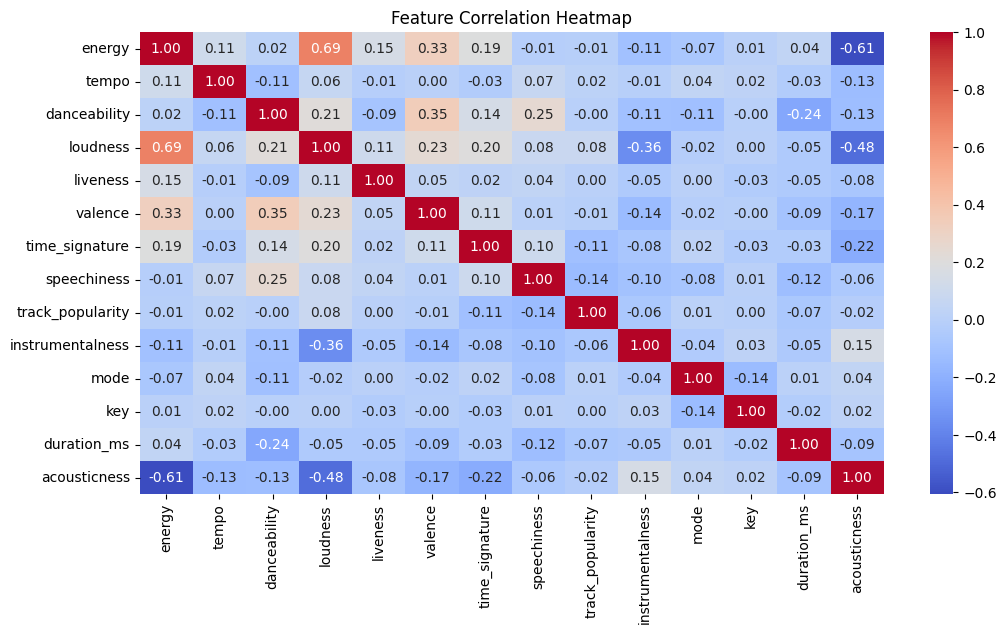

In [ ]:
#Correlation heatmap of numerical features
#Convert relevant columns to numeric before calculating correlation
numeric_cols = data.select_dtypes(include=['number']).columns
#only numeric columns for correlation calculation
correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

Original Data Shape: (1686, 33)
Cleaned Data Shape: (898, 33)


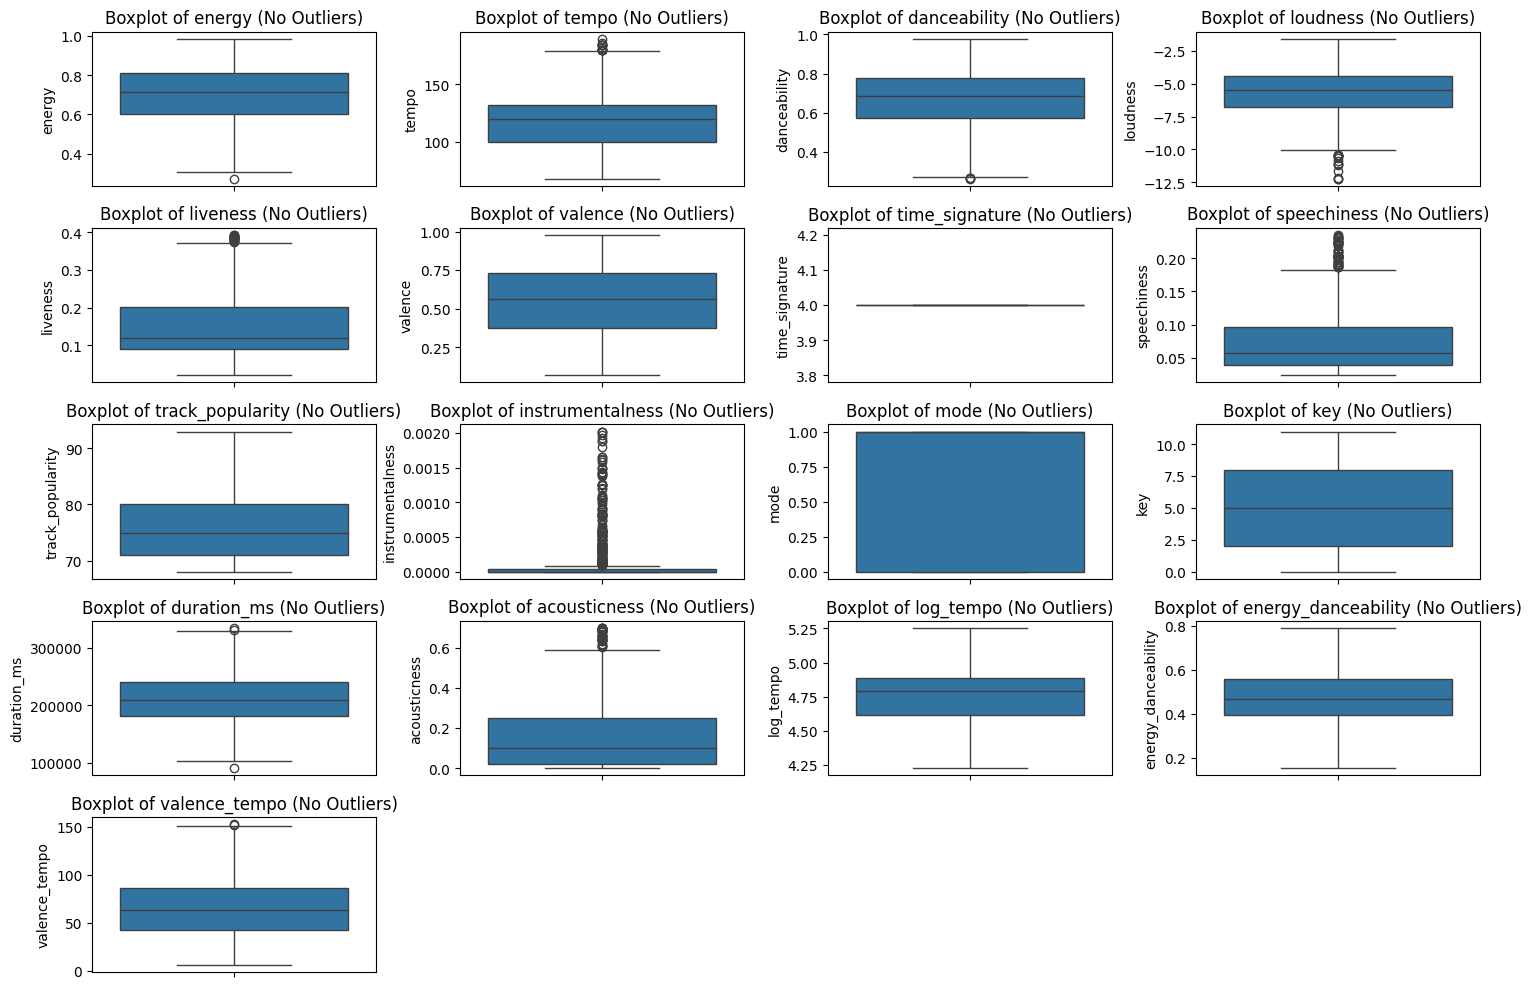

In [ ]:

# Selecting Only Numeric Columns
numeric_columns = data.select_dtypes(include=['number']).columns
# Function to Remove Outliers Using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
# Remove Outliers
cleaned_data = remove_outliers(data, numeric_columns)
# Check Shape Before and After Removing Outliers
print(f"Original Data Shape: {data.shape}")
print(f"Cleaned Data Shape: {cleaned_data.shape}")
# Calculate Number of Rows and Columns for Subplot Grid
num_cols = 4  # Number of columns in the grid
num_rows = int(len(numeric_columns) / num_cols) + (len(numeric_columns) % num_cols > 0)
# Plot Boxplot for Each Numeric Column After Removing Outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=cleaned_data[column])
    plt.title(f'Boxplot of {column} (No Outliers)')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


Random Forest Model Performance:
Accuracy: 0.80
              precision    recall  f1-score   support

        High       0.81      0.98      0.89       266
      Medium       0.69      0.15      0.25        72

    accuracy                           0.80       338
   macro avg       0.75      0.57      0.57       338
weighted avg       0.78      0.80      0.75       338


Gradient Boosting Model Performance:
Accuracy: 0.76
              precision    recall  f1-score   support

        High       0.80      0.94      0.86       266
      Medium       0.35      0.12      0.18        72

    accuracy                           0.76       338
   macro avg       0.57      0.53      0.52       338
weighted avg       0.70      0.76      0.72       338


SVM Model Performance:
Accuracy: 0.64
              precision    recall  f1-score   support

        High       0.80      0.72      0.76       266
      Medium       0.24      0.33      0.28        72

    accuracy                           0.

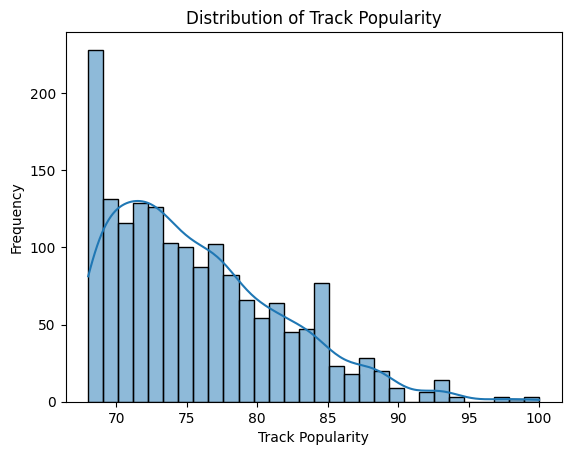

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_csv("high_popularity_spotify_data.csv")

# Feature Engineering: Add log-transformed tempo and interaction features
data['log_tempo'] = np.log1p(data['tempo'])
data['energy_danceability'] = data['energy'] * data['danceability']
data['valence_tempo'] = data['valence'] * data['tempo']

# Categorize popularity
def categorize_popularity(popularity):
    if popularity <= 40:
        return "Low"
    elif popularity <= 70:
        return "Medium"
    else:
        return "High"

data['popularity_category'] = data['track_popularity'].apply(categorize_popularity)

# Features & Labels
features = ['energy', 'tempo', 'danceability', 'loudness', 'valence',
            'speechiness', 'instrumentalness', 'acousticness', 'log_tempo',
            'energy_danceability', 'valence_tempo']
X = data[features]
y = data['popularity_category']

# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=8)  # Keep 8 most important features
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define Classification Models with Balanced Weights
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=12, class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, class_weight='balanced'),
    'XGBoost': xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, scale_pos_weight=1.5, random_state=42)
}

# Train and evaluate models
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    print(f'\n{name} Model Performance:')
    print(f'Accuracy: {acc:.2f}')
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = name

print(f"\n🚀 Best Model: {best_model} with Accuracy: {best_accuracy:.2f}")

sns.histplot(data['track_popularity'], bins=30, kde=True)
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')
plt.show()


<ipython-input-47-d2db55c4df48>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=performance_df, ax=axes[i], palette=[colors[i]])
<ipython-input-47-d2db55c4df48>:37: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Model', y=metric, data=performance_df, ax=axes[i], palette=[colors[i]])
<ipython-input-47-d2db55c4df48>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(performance_df['Model'], rotation=15)
<ipython-input-47-d2db55c4df48>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

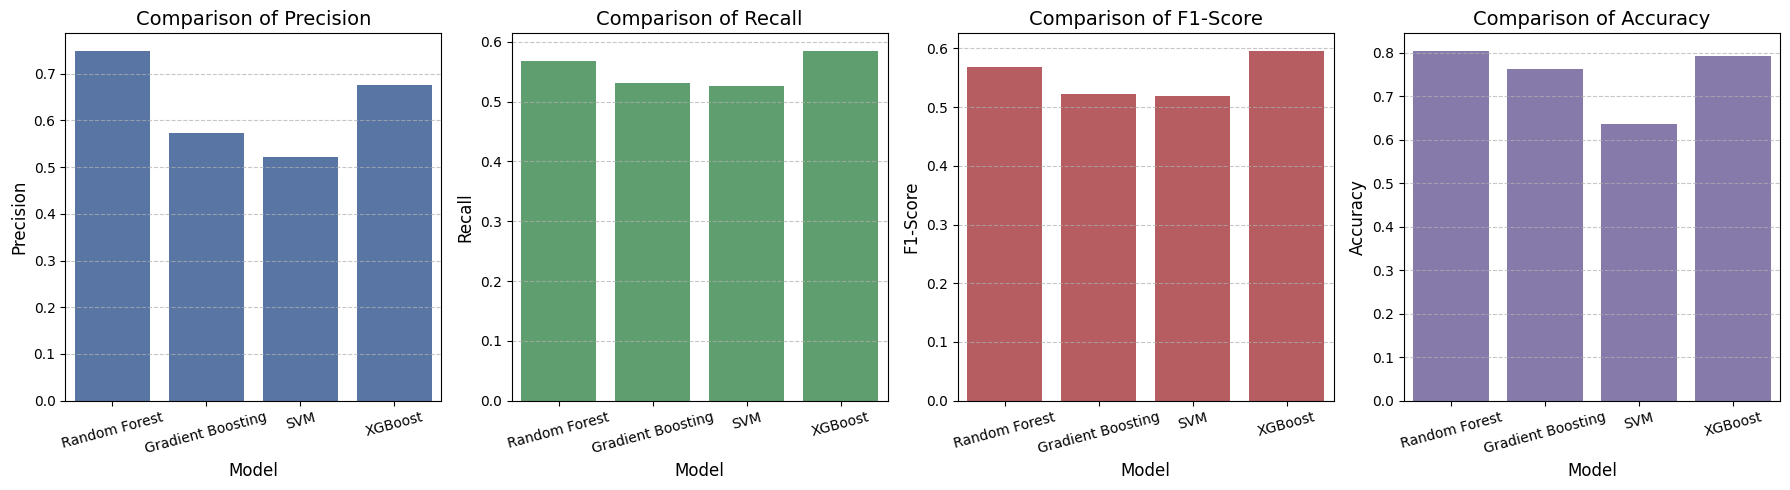

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

# Dictionary to store performance metrics
performance = {'Model': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'Accuracy': []}
predictions = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test_pca)
    predictions[name] = y_pred

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    #Storing average values (macro avg for better representation)
    performance['Model'].append(name)
    performance['Precision'].append(report['macro avg']['precision'])
    performance['Recall'].append(report['macro avg']['recall'])
    performance['F1-Score'].append(report['macro avg']['f1-score'])
    performance['Accuracy'].append(accuracy_score(y_test, y_pred))  # Calculate accuracy

# Convert to DataFrame
performance_df = pd.DataFrame(performance)

# Define plot settings
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']  # Color palette

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=performance_df, ax=axes[i], palette=[colors[i]])
    axes[i].set_title(f'Comparison of {metric}', fontsize=14)
    axes[i].set_xlabel('Model', fontsize=12)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].set_xticklabels(performance_df['Model'], rotation=15)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import scipy.stats as stats
# Load Data
data = pd.read_csv("high_popularity_spotify_data.csv")
# Selecting Only Numeric Columns
numeric_columns = data.select_dtypes(include=['number']).columns
# Compute Skewness and Kurtosis for Each Numeric Column
skewness_kurtosis = pd.DataFrame({
    "Feature": numeric_columns,
    "Skewness": [stats.skew(data[col].dropna()) for col in numeric_columns],
    "Kurtosis": [stats.kurtosis(data[col].dropna()) for col in numeric_columns]
})
# Display Results
print(skewness_kurtosis)

             Feature  Skewness   Kurtosis
0             energy -0.675735   0.309176
1              tempo  0.436022  -0.059009
2       danceability -0.365193  -0.312919
3           loudness -3.234100  21.877983
4           liveness  2.102009   5.823047
5            valence -0.015941  -0.968560
6     time_signature -3.830090  30.397764
7        speechiness  2.108006   5.055073
8   track_popularity  0.896846   0.505472
9   instrumentalness  4.455517  19.509779
10              mode -0.317079  -1.899461
11               key  0.048821  -1.296698
12       duration_ms  0.989447   3.103622
13      acousticness  1.291571   0.755974
